In [1]:
%reload_ext autoreload
%autoreload 2
%cd ../../

/home/hazzu/Code/thesis


In [4]:
import os, cv2
import os.path as osp
from tqdm import tqdm
from lib.face_detector import RetinaFaceDetector

face_detector = RetinaFaceDetector()
cards_size = {"TheSinhVien": [], "TheThuVien": []}

CARDS_DIR = "datasets/cards"
cards_name = os.listdir(CARDS_DIR)

for card_name in tqdm(cards_name, desc="Statistics size of cards"):
    card_type = card_name.split("_")[-1].split(".")[0]

    image_path = osp.join(CARDS_DIR, card_name)
    image = cv2.imread(image_path)
    faces = face_detector.detect(image)

    if (faces is None) or (len(faces) != 1):
        print(f"Thẻ sinh viên {image_path} không hợp lệ")
        continue

    face = faces[0]
    cards_size[card_type].append((face.bbox["w"], face.bbox["h"]))

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
model ignore: /home/hazzu/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecution

Statistics size of cards: 100%|██████████| 334/334 [00:10<00:00, 31.26it/s]


In [7]:
no_cards = {
    "TheSinhVien": len(cards_size["TheSinhVien"]),
    "TheThuVien": len(cards_size["TheThuVien"]),
}

print(
    f"Tổng số lượng thẻ sinh viên: {no_cards['TheSinhVien'] + no_cards['TheThuVien']} thẻ"
)
print(f"Số lượng thẻ sinh viên: {no_cards['TheSinhVien']} thẻ")
print(f"Số lượng thẻ thư viện: {no_cards['TheThuVien']} thẻ")

Tổng số lượng thẻ sinh viên: 334 thẻ
Số lượng thẻ sinh viên: 67 thẻ
Số lượng thẻ thư viện: 267 thẻ


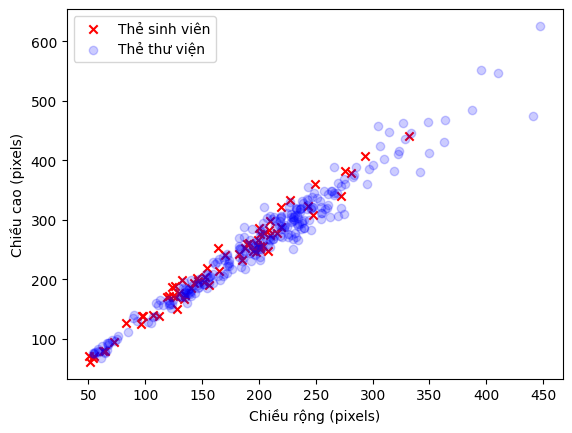

In [10]:
from matplotlib import pyplot as plt

plt.scatter(
    *zip(*cards_size["TheSinhVien"]),
    color="red",
    label="Thẻ sinh viên",
    marker="x",
)
plt.scatter(
    *zip(*cards_size["TheThuVien"]), color="blue", label="Thẻ thư viện", alpha=0.2
)
plt.xlabel("Chiều rộng (pixels)")
plt.ylabel("Chiều cao (pixels)")
plt.legend()
plt.show()